In [1]:
#Importing pandas library for Data Manipulation
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\nishant\Downloads\Advertising.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
#Descriptive statistics for numerical data
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [5]:
#checking for the missing values
pd.isnull(df).any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
#reading first five rows
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([47., 41., 35., 30., 21., 13.,  9.,  2.,  1.,  1.]),
 array([  0.3 ,  11.67,  23.04,  34.41,  45.78,  57.15,  68.52,  79.89,
         91.26, 102.63, 114.  ]),
 <a list of 10 Patch objects>)

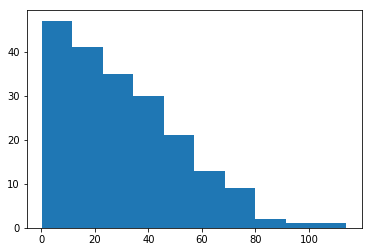

In [9]:
plt.hist(df['Newspaper'],bins=10)

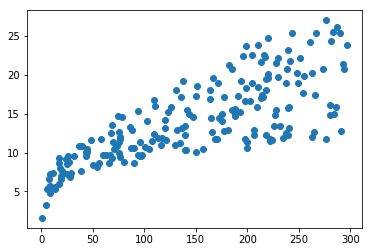

In [10]:
plt.scatter(x=df['TV'],y=df['Sales'])

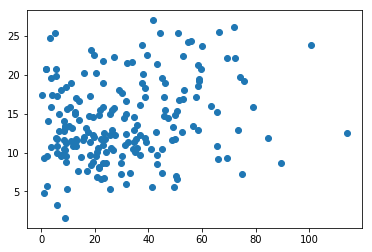

In [11]:
plt.scatter(x=df['Newspaper'],y=df['Sales'])

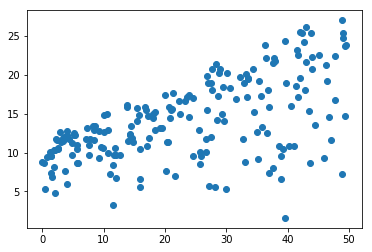

In [12]:
plt.scatter(x=df['Radio'],y=df['Sales'])

In [13]:
df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

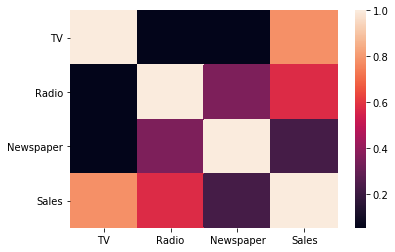

In [14]:
# calculate the correlation matrix
import seaborn as sns
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test=train_test_split(df.drop('Sales',axis=1),df['Sales'],test_size=.20,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression(normalize=True)

In [19]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
prediction=model.predict(X_test)

Comparing actual and predicted value of test data

In [21]:
pd.DataFrame({'actual value': Y_test, 'prediction':prediction}).sample(10)

actual value  prediction
152          16.6   16.265073
60            8.1    5.809574
66            9.5    9.048320
104          20.7   20.137663
125          10.6    9.183496
16           12.5   13.251035
135          11.6   14.055140
75            8.7   12.249664
15           22.4   20.889882
174          11.5   13.606346

In [22]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [23]:
model.intercept_

2.9790673381226256

In [24]:
#R^2 value

model.score(X_test, Y_test)

0.899438024100912

In [25]:
#from metrics class in scikit-learn, import more error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
mean_absolute_error(Y_test, prediction)

1.4607567168117603

In [27]:
mean_squared_error(Y_test, prediction)

3.174097353976105

In [28]:
r2_score(Y_test, prediction)

0.899438024100912

# Dropping Newspaper column

In [29]:
X_train, X_test, Y_train, Y_test=train_test_split(df.drop(['Sales','Newspaper'],axis=1),df['Sales'],test_size=.20,random_state=42)

In [30]:
model=LinearRegression(normalize=True)

In [31]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
prediction=model.predict(X_test)

Comparing actual and predicted value of test data

In [33]:
pd.DataFrame({'actual value': Y_test, 'prediction':prediction}).sample(10)

actual value  prediction
148          10.9   12.411821
164          11.9   11.073221
137          20.8   20.780675
67           13.4   12.023583
128          24.7   22.224596
104          20.7   20.222424
135          11.6   14.149994
182           8.7    6.628789
152          16.6   16.309115
170           8.4    7.476411

In [34]:
model.score(X_test, Y_test)

0.9005833101920357

In [35]:
r2_score(Y_test, prediction)

0.9005833101920356

# Statistical method

In [36]:
#Import statsmodels API
import statsmodels.api as sm

In [37]:
#Read the data
df1=pd.read_csv(r'C:\Users\nishant\Downloads\Advertising.csv')

In [38]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [39]:
df1.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [40]:
from sklearn.model_selection import train_test_split

Divide the data into train and test sets

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop("Sales", axis=1), df1['Sales'], test_size = 0.2,\
                                                    random_state=112)

Add the constant term to the training data

In [42]:
X_train = sm.add_constant(X_train)

Fit the OLS model

In [43]:
my_model = sm.OLS(Y_train, X_train)

In [44]:
result = my_model.fit()

In [45]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     445.1
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           3.18e-76
Time:                        22:04:11   Log-Likelihood:                -310.55
No. Observations:                 160   AIC:                             629.1
Df Residuals:                     156   BIC:                             641.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9788      0.347      8.595      0.0

In [46]:
result.rsquared

0.8953951101327008

Observations
From the model results we see that the the parameter for newspaper is not significantly different from zero at 5% significance level.
(because the confidence interval for its coefficient includes zero and the p-value is very high than the significance level of 0.05)
Parameter for youtube and facebook variables, on the other hand, are significantly different from zero. (because the corresponding confidence interval does not include zero and the p-value is almost zero.(lower than 0.05 significane level)
Hence we can conclude that the money spent on newspaper advertising doesn't play a significant role in sales.

Let's now test our inference and drop the newspaper variable and just use youtube and facebook advertisement data to predict the sales

In [47]:
X_train = X_train.drop("Newspaper", axis=1)

In [48]:
updated_model_result = sm.OLS(Y_train, X_train).fit()

In [49]:
print(updated_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     671.9
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.08e-77
Time:                        22:04:12   Log-Likelihood:                -310.55
No. Observations:                 160   AIC:                             627.1
Df Residuals:                     157   BIC:                             636.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9833      0.331      9.015      0.0

In [50]:
updated_model_result.rsquared

0.8953937261140363

We see that even though our  R2  value has very slightly decreased, but the Adjusted  R2  value has increased. This confirms that the newspaper variable wasn't significant in calculating the sales and by keeping the newspaper variable.

Let's also see the accuracy ( R2 ) value on the test set, with this updated model.

In [51]:
from sklearn.metrics import r2_score

In [52]:
X_test = X_test.drop("Newspaper", axis=1)

In [53]:
predictions = updated_model_result.predict(sm.add_constant(X_test))

In [54]:
r2_score(Y_test, predictions)

0.903985284930494